In [11]:
import sys
import os

# # Get the project root (go up from tests to project root)
project_root = os.path.dirname(os.path.abspath('.'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

### Get Key Moments

In [12]:
from models.KeyMomentsFinder import KeyMomentsFinder

In [13]:
kmf = KeyMomentsFinder()
match_id = 1886347

In [14]:
def shot_sequence_logic(df):
    """Logic for shot sequences: all events before and including each shot get same number"""
    df = df[(df['lead_to_shot'] == True) & (df['event_type'] == 'player_possession')]
    return (df['end_type'] == 'shot').cumsum().shift(1, fill_value=0) + 1

config = {
    'match_id': match_id,
    'sequence_func': shot_sequence_logic,
    'column_aggregations': {
        'frame_start': 'min',
        'frame_end': 'max',
        'lead_to_goal': 'first'
    }
}

In [15]:
all_shots = kmf.find_key_moments(config)

In [16]:
all_shots.head()

,Sequence_ID,frame_start,frame_end,lead_to_goal
0,1.0,1344,1444,False
1,2.0,4163,4236,False
2,3.0,5399,5505,False
3,4.0,10816,10841,False
4,5.0,12156,12202,False


### Plot episodes

In [17]:
from models.GameRenderer import GameRenderer
game_renderer = GameRenderer()
match_id = 1886347


KeyboardInterrupt: 

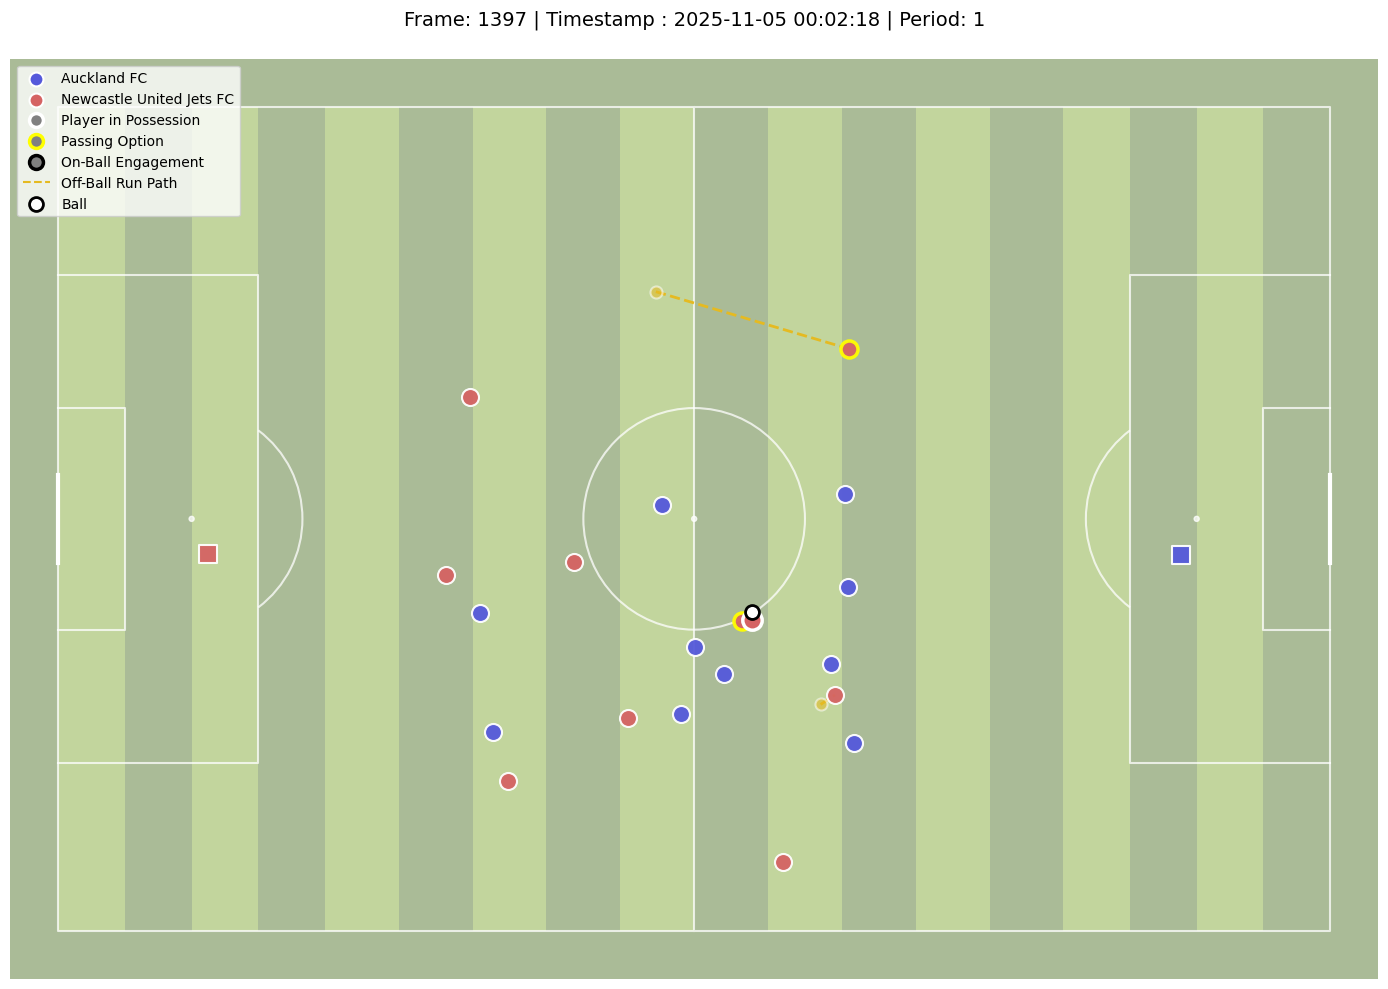

In [18]:
for i in range(len(all_shots)):
    start_frame = all_shots.iloc[i]['frame_start']-20
    end_frame = all_shots.iloc[i]['frame_end']+20
    print(f"Plotting shot {i+1}: frames {start_frame} to {end_frame}")
    game_renderer.plot_episode(match_id, start_frame=start_frame, end_frame=end_frame, delay=0)